# MOVIE GENRE CLASSIFICATION

# Importing libraries to be used 

In [2]:
import numpy as np                 # library for numerical operations                                                              
import pandas as pd                # Used for data manipulation and analysis
import matplotlib.pyplot as plt    # plotting library for creating interactive visualizations 
import seaborn as sns              # data visualization library for drawing attractive and informative statistical graphics
import re                          # regular expression module for pattern matching with strings
import string                      # module containing common string operations
import nltk                        # Natural Language Toolkit, a library used to work with language data, includes tools for tokenization
from nltk.corpus import stopwords  #  list of common stop words that can be filtered out in text processing
from nltk.stem import LancasterStemmer    # stemming algorithm for reducing words to their base or root form
from collections import Counter           #
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
train_path='train_data.txt'
train_data=pd.read_csv( train_path , sep=':::',engine='python',names=['Title','Genre','Description'])
train_data.head(10)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [4]:
test_path='test_data.txt'
test_data=pd.read_csv( test_path , sep=':::',engine='python',names=['ID', 'Title','Description'])
test_data.head(10)

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...
9,10,Press (2011),Press is a story of young people overwhelmed ...


In [5]:
train_data.describe()        # the DataFrame has only text or categorical data, the output may not be as informative

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [6]:
train_data['Genre'].unique() # will give unique values in particular in Genre column

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [7]:
train_data.info()     # will give information about the data types and the count of non-null values for each column

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [8]:
train_data.duplicated().sum()  # will give duplicate rows in a dataframe and sum will total number of duplicate rows in dataframe

0

In [9]:
train_data.isnull().sum()    # checking for missing values 

Title          0
Genre          0
Description    0
dtype: int64

In [10]:
train_data.shape   # tuple representing the dimensions of the DataFrame and will return the number of rows and columns in DataFrame

(54214, 3)

In [11]:
test_data.shape

(54200, 3)

In [12]:
train_data['length']=train_data['Description'].apply(len)    # creating a new column called length and finding number of characters in each Description of dataframe
train_data.head(10)

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,1609
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,345
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...,332
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss...",456
10,Spirits (2014/I),horror,Four high school students embark on a terrify...,426


In [13]:
counts = train_data.Genre.value_counts()   # using the value_counts() method on the 'Genre' column in train_data DataFrame, this method is used to count the occurrences of each unique value in a categorical column
counts

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

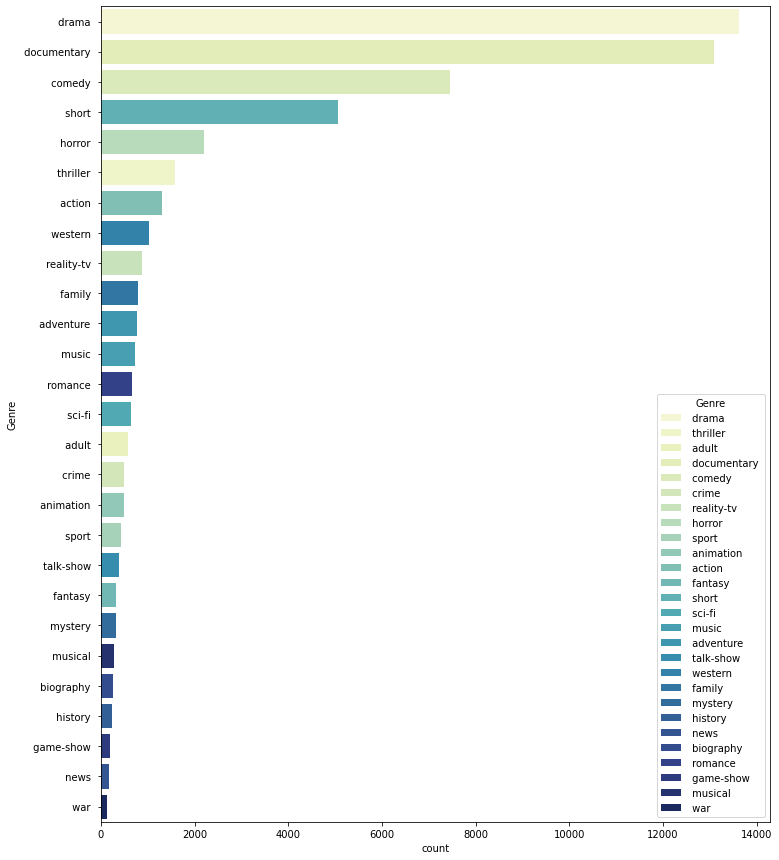

In [14]:
plt.figure(figsize=(12, 15))
sns.countplot(data=train_data, y="Genre", hue="Genre", palette="YlGnBu", order=train_data["Genre"].value_counts().index, legend=True)
plt.show()   # using matplotlib and seaborn to create a count plot to visualize the distribution of genres in your training data

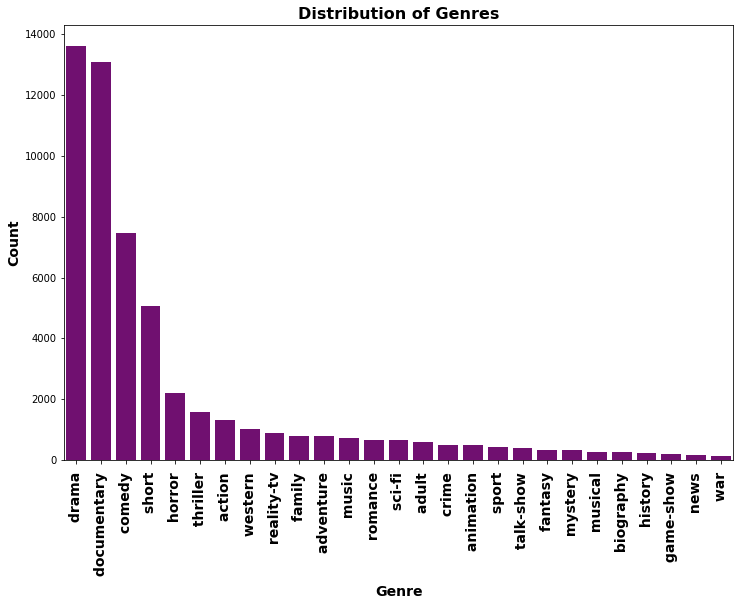

In [15]:
plt.figure(figsize=(12,8))               # using matplotlib and seaborn to create a bar plot to visualize the distribution of genres in your training data
counts = train_data.Genre.value_counts()
sns.barplot(x=counts.index, y=counts, color='purple')
plt.xlabel('Genre' ,fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold');

In [16]:
def data_processing(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_data["TextCleaning"] = train_data["Description"].apply(data_processing)
test_data["TextCleaning"] = test_data["Description"].apply(data_processing)

In [17]:
train_data

,Title,Genre,Description,length,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film title refers recovered bodies ground zero...
...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,507,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,781,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",255,bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,642,walter vivian live country difficult time keep...


# Using TF-IDF to Vectorize the Data

In [35]:
vectorizer = TfidfVectorizer()

x_train = vectorizer.fit_transform(train_data["TextCleaning"])
x_test = vectorizer.transform(test_data["TextCleaning"])

# Split the data into train data and test data

In [36]:
x = x_train
y = train_data["Genre"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [37]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (43371, 116601)
Size of y_train:  (43371,)
Size of x_test:  (10843, 116601)
Size of y_test:  (10843,)


# Train the model


In [38]:
model1 = LogisticRegression()
model3 = MultinomialNB()

In [39]:
columns=['LogisticRegression','MultinomialNB']
result=[]

In [40]:
def cal(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred,y_test)
    result.append(accuracy)
    
    print("Model Evaluation on Test Data")
    print(model)
    print(accuracy)

# Logistic Regression Model

In [41]:
cal(model1)

Model Evaluation on Test Data
LogisticRegression()
0.5774232223554366


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Naive Bayes Model

In [ ]:
# Hyperparameter tuning for MultinomialNB
param_grid_nb = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(x_train, y_train)
best_nb = grid_search_nb.best_estimator_

In [42]:
cal(model3)

Model Evaluation on Test Data
MultinomialNB()
0.4460942543576501


In [43]:
final_result = pd.DataFrame({'Algorithm':columns, 'Accuracy':result}) 

In [44]:
final_result

,Algorithm,Accuracy
0,LogisticRegression,0.577423
1,MultinomialNB,0.446094


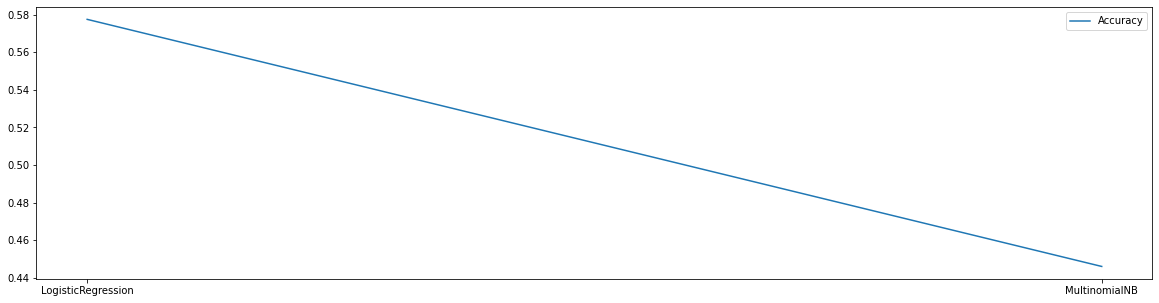

In [46]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.Algorithm,result,label="Accuracy")
plt.legend()
plt.show()